In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def parse_year(year):
    return pd.to_datetime(str(year), format='%Y')

In [3]:
immo_df = pd.read_csv('../data/cleaned/appended_data.csv')
immo_df.head()

,Unnamed: 0,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,Municipality,Province
0,0,11149965,Waremme,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
1,1,11149932,Wetteren,9230,2015.0,3.0,134.0,NaN,APARTMENT,DUPLEX,...,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,WETTEREN,OOST-VLAANDEREN
2,2,11150061,Ixelles,1050,1958.0,2.0,134.0,NaN,APARTMENT,APARTMENT,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELSENE,BRUSSEL
3,3,11153822,BERCHEM,2600,1968.0,2.0,90.0,NaN,APARTMENT,APARTMENT,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ANTWERPEN,ANTWERPEN
4,4,11153121,Jette,1090,1965.0,2.0,80.0,NaN,APARTMENT,APARTMENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JETTE,BRUSSEL


In [39]:
from src.clean import Clean

immo_df = Clean().exclude_outliers(immo_df)

0                 GOOD
1                 GOOD
2                 GOOD
3                 GOOD
4                 GOOD
             ...      
12380             GOOD
12381    TO_BE_DONE_UP
12382    TO_BE_DONE_UP
12385             GOOD
12387             GOOD
Name: State of Building, Length: 11155, dtype: object

In [7]:
immo_df.describe()

,Unnamed: 0,ID,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Price,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,Terrace Surface,Garden Surface,Living Surface,Consumption Per m2,Cadastral Income,Parking count inside,Parking count outside
count,11155.000000,1.115500e+04,11155.000000,8317.000000,8258.000000,10853.000000,3229.000000,11155.000000,11155.000000,9830.000000,8731.000000,11098.000000,3544.000000,7522.000000,1727.000000,5386.000000,7032.000000,11155.000000,3296.000000,3809.000000
mean,6124.484088,1.099960e+07,4319.906768,1995.209571,2.659845,115.830277,471.894704,356371.174541,2.209144,1.187996,1.415645,4.386466,10.718679,17.733183,258.105385,33.821946,239.521441,285.496369,19.334648,7.968233
std,3560.799776,3.668897e+05,3203.136337,35.531100,0.814926,54.670289,512.395986,152063.136376,0.947381,0.415464,0.579788,1.690088,6.335625,23.169400,415.108335,56.993952,932.096971,555.454692,615.783052,23.074341
min,0.000000,7.775445e+06,1000.000000,1853.000000,2.000000,12.000000,0.000000,30000.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-18.000000,0.000000,1.000000,1.000000
25%,3090.500000,1.101805e+07,1301.000000,1971.000000,2.000000,82.000000,149.000000,259000.000000,2.000000,1.000000,1.000000,3.000000,6.000000,9.000000,50.000000,28.000000,81.000000,0.000000,1.000000,1.000000
50%,6080.000000,1.113994e+07,2940.000000,2019.000000,2.000000,102.000000,295.000000,324500.000000,2.000000,1.000000,1.000000,4.000000,9.000000,12.000000,109.000000,31.000000,182.000000,0.000000,1.000000,1.000000
75%,9183.500000,1.115718e+07,7800.000000,2023.000000,3.000000,140.000000,600.000000,420000.000000,3.000000,1.000000,2.000000,6.000000,12.000000,20.000000,250.500000,38.000000,289.000000,458.000000,1.000000,2.000000
max,12387.000000,1.116304e+07,9990.000000,2026.000000,4.000000,490.000000,2990.000000,999000.000000,4.000000,3.000000,5.000000,11.000000,61.000000,973.000000,2838.000000,4146.000000,43792.000000,5253.000000,25000.000000,155.000000


In [8]:
immo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11155 entries, 0 to 12387
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11155 non-null  int64  
 1   ID                     11155 non-null  int64  
 2   Locality               11155 non-null  object 
 3   Postal Code            11155 non-null  int64  
 4   Build Year             8317 non-null   float64
 5   Facades                8258 non-null   float64
 6   Habitable Surface      10853 non-null  float64
 7   Land Surface           3229 non-null   float64
 8   Type                   11155 non-null  object 
 9   Subtype                11155 non-null  object 
 10  Price                  11155 non-null  int64  
 11  Sale Type              11155 non-null  object 
 12  Bedroom Count          11155 non-null  float64
 13  Bathroom Count         9830 non-null   float64
 14  Toilet Count           8731 non-null   float64
 15  Room Co

In [9]:
immo_df.isnull().any()

Unnamed: 0               False
ID                       False
Locality                 False
Postal Code              False
Build Year                True
Facades                   True
Habitable Surface         True
Land Surface              True
Type                     False
Subtype                  False
Price                    False
Sale Type                False
Bedroom Count            False
Bathroom Count            True
Toilet Count              True
Room Count                True
Kitchen                  False
Kitchen Surface           True
Kitchen Type              True
Furnished                False
Openfire                 False
Terrace                  False
Terrace Surface           True
Terrace Orientation       True
Garden Exists            False
Garden Surface            True
Garden Orientation        True
Swimming Pool             True
State of Building         True
Living Surface            True
EPC                       True
Consumption Per m2        True
Cadastra

In [10]:
immo_df.shape

(11155, 43)

In [11]:
immo_df.columns

Index(['Unnamed: 0', 'ID', 'Locality', 'Postal Code', 'Build Year', 'Facades',
       'Habitable Surface', 'Land Surface', 'Type', 'Subtype', 'Price',
       'Sale Type', 'Bedroom Count', 'Bathroom Count', 'Toilet Count',
       'Room Count', 'Kitchen', 'Kitchen Surface', 'Kitchen Type', 'Furnished',
       'Openfire', 'Terrace', 'Terrace Surface', 'Terrace Orientation',
       'Garden Exists', 'Garden Surface', 'Garden Orientation',
       'Swimming Pool', 'State of Building', 'Living Surface', 'EPC',
       'Consumption Per m2', 'Cadastral Income', 'Has starting Price',
       'Transaction Subtype', 'Heating Type', 'Is Holiday Property',
       'Gas Water Electricity', 'Sea view', 'Parking count inside',
       'Parking count outside', 'Municipality', 'Province'],
      dtype='object')

In [40]:
columns_selected_names = ['Price', 'Postal Code', 'Build Year', 'Facades', 'Habitable Surface', 'Land Surface', 'Type', 'Subtype', 'Sale Type', 'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Surface', 'Furnished', 'Living Surface', 'State of Building']

In [13]:
immo_extracted = immo_df[columns_selected_names]
immo_extracted.head()

,Price,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Sale Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,Furnished,Living Surface
0,220000,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,NORMAL_SALE,3.0,1.0,2.0,6.0,10.0,False,34.0
1,339000,9230,2015.0,3.0,134.0,NaN,APARTMENT,DUPLEX,NORMAL_SALE,3.0,1.0,2.0,6.0,NaN,False,30.0
2,495000,1050,1958.0,2.0,134.0,NaN,APARTMENT,APARTMENT,NORMAL_SALE,2.0,1.0,2.0,5.0,8.0,False,40.0
3,175000,2600,1968.0,2.0,90.0,NaN,APARTMENT,APARTMENT,NORMAL_SALE,2.0,1.0,1.0,4.0,9.0,False,37.0
4,289000,1090,1965.0,2.0,80.0,NaN,APARTMENT,APARTMENT,NORMAL_SALE,3.0,1.0,1.0,5.0,9.0,False,30.0


In [14]:
immo_extracted.Price.describe()

count     11155.000000
mean     356371.174541
std      152063.136376
min       30000.000000
25%      259000.000000
50%      324500.000000
75%      420000.000000
max      999000.000000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Postal Code'>

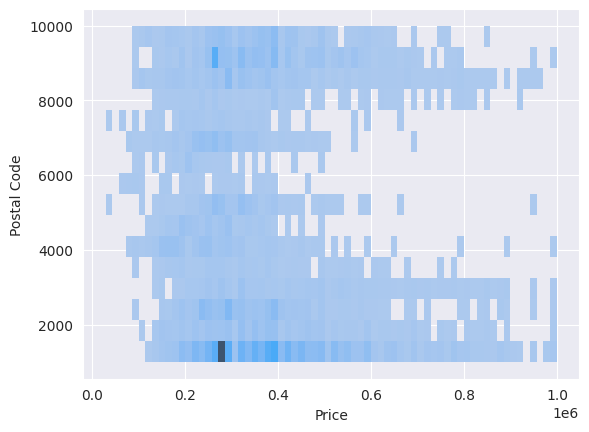

In [15]:
sns.histplot(data=immo_extracted, x= 'Price', y= 'Postal Code')

<Axes: xlabel='Postal Code', ylabel='Price'>

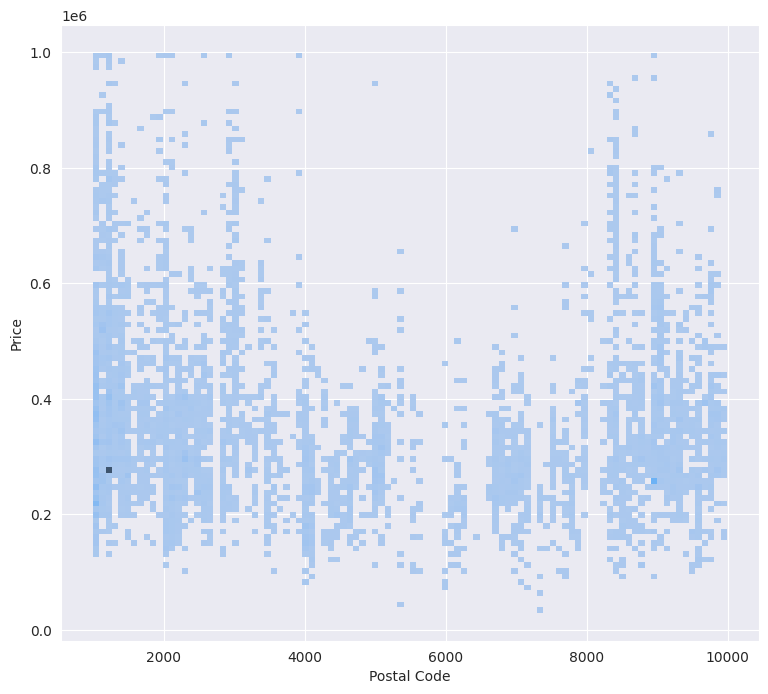

In [16]:
plt.figure(figsize=(9, 8))
sns.histplot(data=immo_extracted, x='Postal Code', y='Price', bins=100) 

<Axes: xlabel='Postal Code', ylabel='Price'>

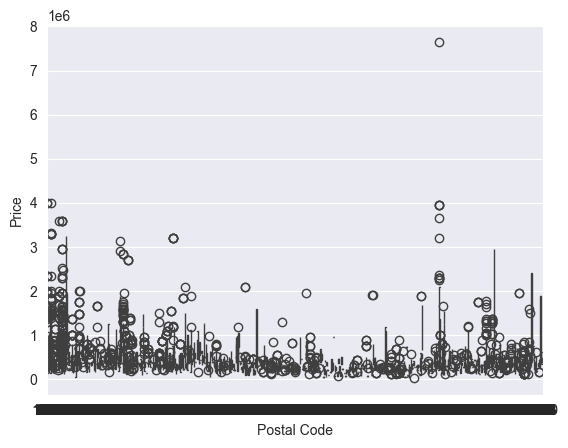

In [33]:
sns.boxplot(data=immo_extracted, x='Postal Code', y='Price')

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Build Year'}>],
       [<Axes: title={'center': 'Facades'}>,
        <Axes: title={'center': 'Habitable Surface'}>,
        <Axes: title={'center': 'Land Surface'}>],
       [<Axes: title={'center': 'Bedroom Count'}>,
        <Axes: title={'center': 'Bathroom Count'}>,
        <Axes: title={'center': 'Toilet Count'}>],
       [<Axes: title={'center': 'Room Count'}>,
        <Axes: title={'center': 'Kitchen Surface'}>,
        <Axes: title={'center': 'Living Surface'}>]], dtype=object)

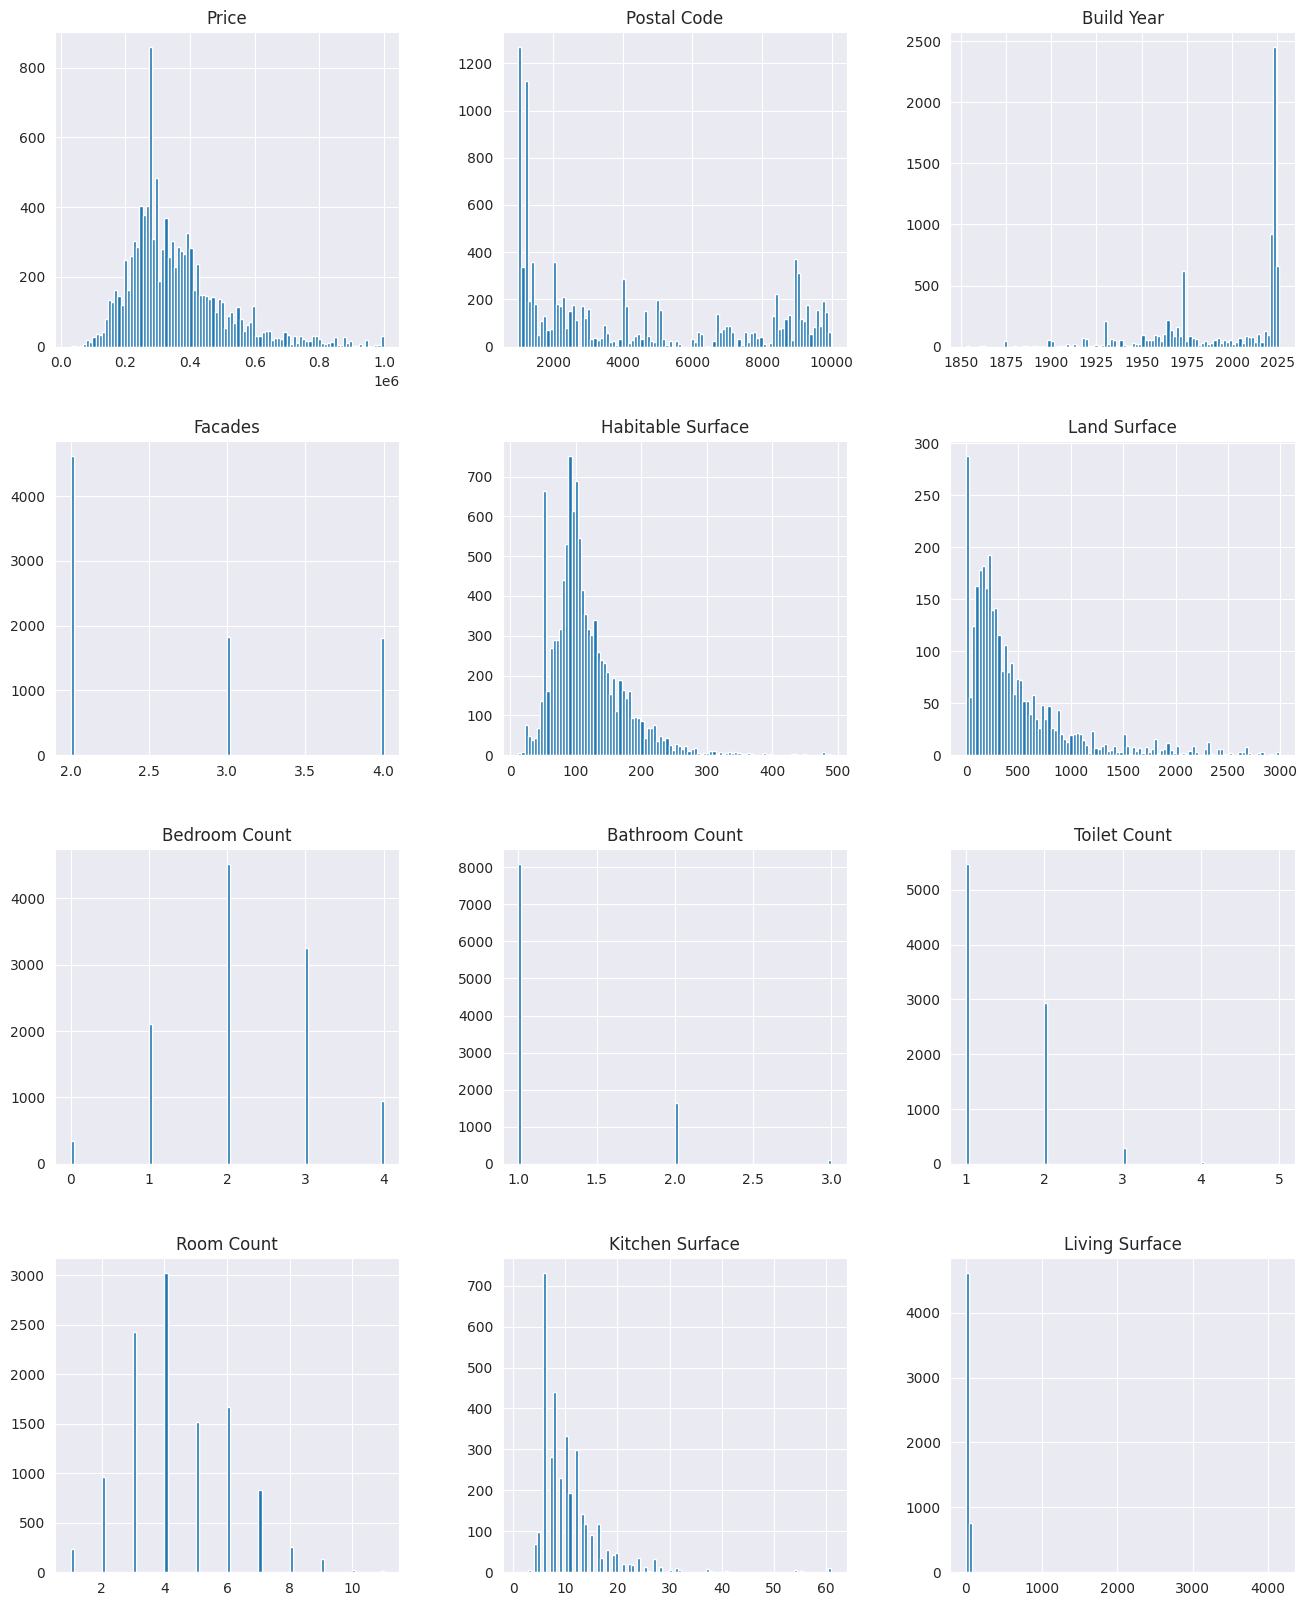

In [17]:
immo_extracted.hist(figsize=(16, 20), bins=100)

In [41]:
# use NONE = -1, TO_RESTORE = 1, TO_RENOVATE = 2, TO_BE_DONE_UP = 3, GOOD = 4, JUST_RENOVATED = 5, AS_NEW = 6 to update the value of the column State of Building
map = {np.NAN: -1, 'TO_RESTORE': 1, 'TO_RENOVATE': 2, 'TO_BE_DONE_UP': 3, 'GOOD': 4, 'JUST_RENOVATED': 5, 'AS_NEW': 6}
immo_extracted['State of Building'].apply(lambda x: map[x])

KeyError: 'State of Building'

# HOUSE AND APARTMENT

In [18]:
correlation_matrix = immo_extracted[['Price', 'Postal Code', 'Build Year', 'Facades', 'Habitable Surface', 'Land Surface', 'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Surface', 'Living Surface']].corr()

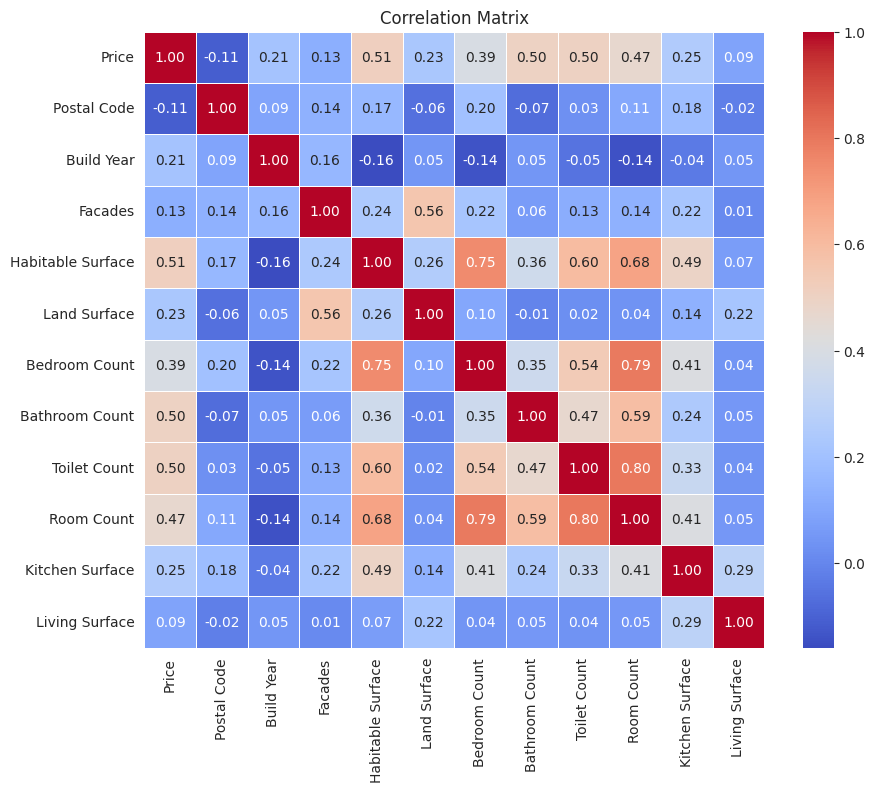

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# HOUSE

In [33]:
immo_extracted_house = immo_extracted[immo_extracted['Type'] == 'HOUSE']
immo_extracted_house.head()

,Price,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Sale Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,Furnished,Living Surface
113,378500,9800,2024.0,2.0,123.0,175.0,HOUSE,HOUSE,NORMAL_SALE,3.0,1.0,2.0,6.0,9.0,False,30.0
114,378500,9800,2024.0,2.0,123.0,175.0,HOUSE,HOUSE,NORMAL_SALE,3.0,1.0,2.0,6.0,9.0,False,30.0
115,378500,9800,2024.0,2.0,123.0,175.0,HOUSE,HOUSE,NORMAL_SALE,3.0,1.0,2.0,6.0,9.0,False,30.0
116,381000,9800,2024.0,2.0,123.0,191.0,HOUSE,HOUSE,NORMAL_SALE,3.0,1.0,2.0,6.0,8.0,False,33.0
117,399500,9800,2024.0,3.0,123.0,168.0,HOUSE,VILLA,NORMAL_SALE,3.0,1.0,2.0,6.0,8.0,False,31.0


In [34]:
correlation_matrix = immo_extracted_house[['Price', 'Postal Code', 'Build Year', 'Facades', 'Habitable Surface', 'Land Surface', 'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Surface', 'Living Surface']].corr()

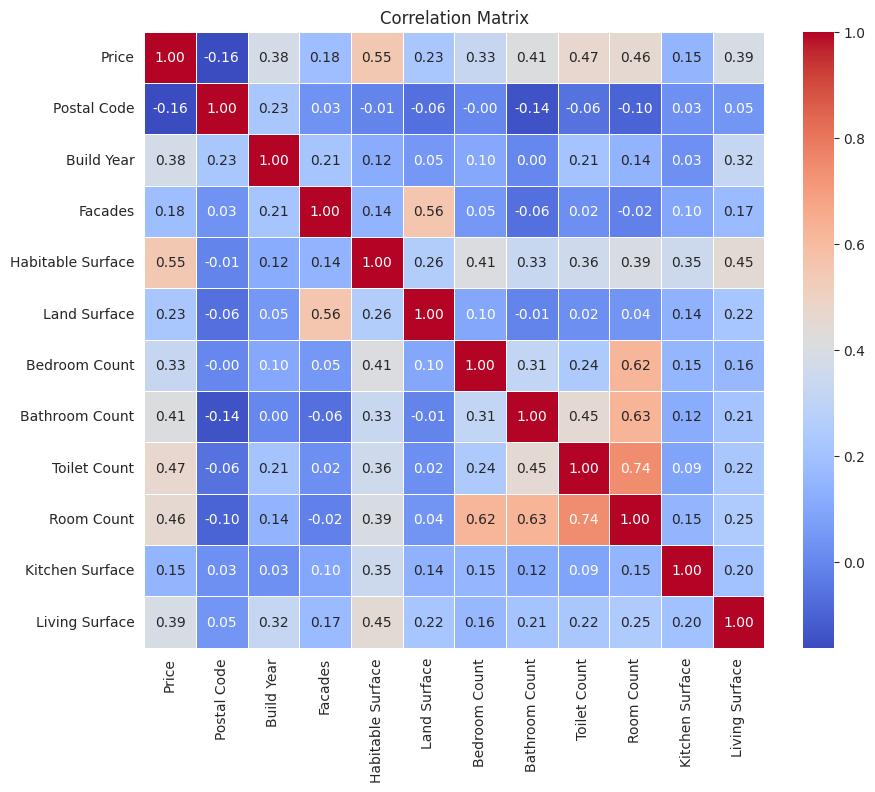

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# APARTMENT

In [36]:
immo_extracted_apartment = immo_extracted[immo_extracted['Type'] == 'APARTMENT']
immo_extracted_apartment.head()

,Price,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Sale Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,Furnished,Living Surface
0,220000,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,NORMAL_SALE,3.0,1.0,2.0,6.0,10.0,False,34.0
1,339000,9230,2015.0,3.0,134.0,NaN,APARTMENT,DUPLEX,NORMAL_SALE,3.0,1.0,2.0,6.0,NaN,False,30.0
2,495000,1050,1958.0,2.0,134.0,NaN,APARTMENT,APARTMENT,NORMAL_SALE,2.0,1.0,2.0,5.0,8.0,False,40.0
3,175000,2600,1968.0,2.0,90.0,NaN,APARTMENT,APARTMENT,NORMAL_SALE,2.0,1.0,1.0,4.0,9.0,False,37.0
4,289000,1090,1965.0,2.0,80.0,NaN,APARTMENT,APARTMENT,NORMAL_SALE,3.0,1.0,1.0,5.0,9.0,False,30.0


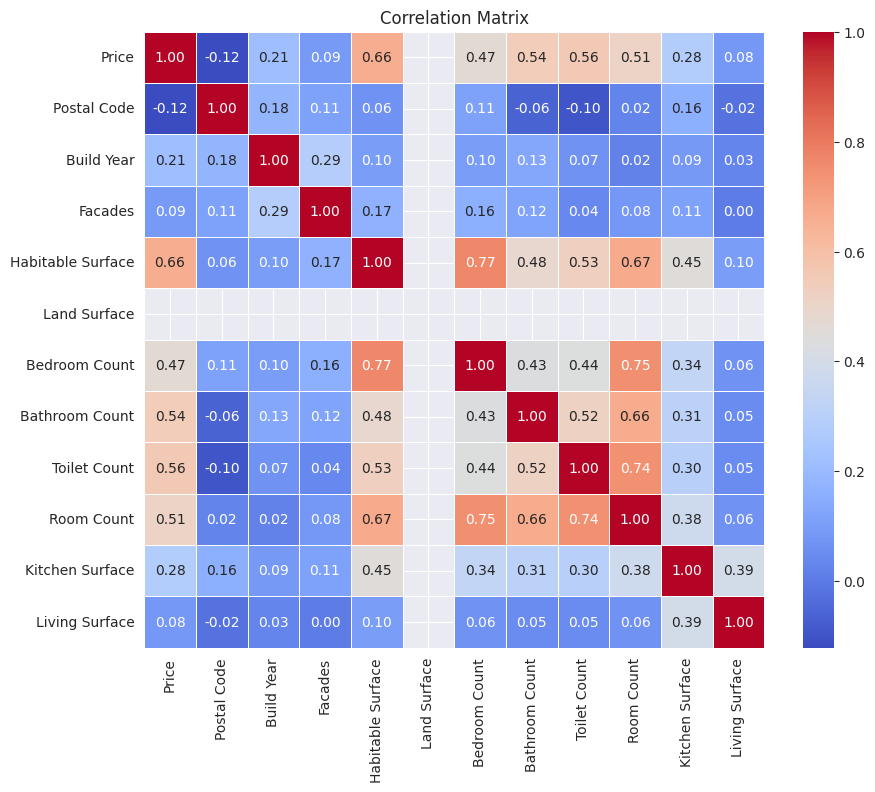

In [37]:
correlation_matrix = immo_extracted_apartment[['Price', 'Postal Code', 'Build Year', 'Facades', 'Habitable Surface', 'Land Surface', 'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Surface', 'Living Surface']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()